In [248]:
import numpy as np
import seaborn as sns
sns.set_theme(style = 'darkgrid')
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import random

## 1 Feature

<Axes: >

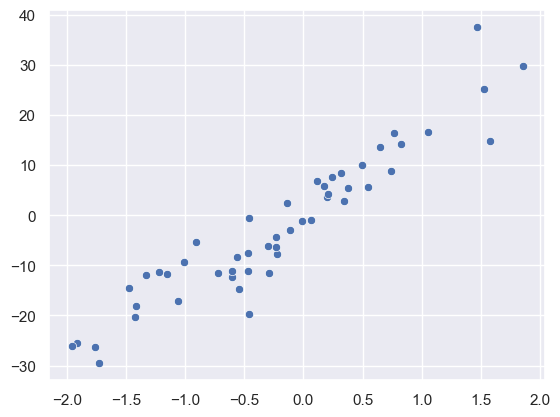

In [249]:
X, y = make_regression(n_samples=50, n_features=1, noise=5, random_state=42)
X =np.ravel(X)
sns.scatterplot(x = X,y = y)

# Random Line

In [250]:
# y = mx + c
# y = weights + biases
# wieghts = mx
# biases = c

# initialize with random m, c
random.seed(10)

m = random.random()
c = random.random()
print(m,c)

0.5714025946899135 0.4288890546751146


In [251]:
# First (random) attempt
preds = m * X + c

<Axes: >

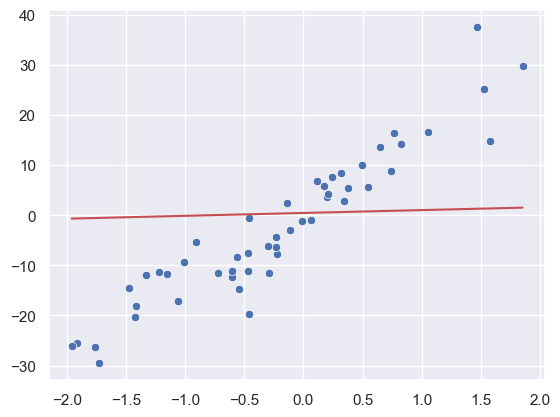

In [252]:
sns.scatterplot(x = X,y = y)
sns.lineplot(x = X,y = preds, c = 'r')

## Measuring Error

Using RMSE: 

$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$


In [253]:
def rmse(X, y, preds):
    n = len(X)
    return np.sqrt((sum((y - preds)**2)) / n)

In [254]:
rmse(X, y, preds)

14.263971682780822

## Gradient Descent

Cost function = -RMSE

With negative RMSE and subtraction from weights/bias we can ensure the adjustment of m/c is correct:


In [255]:
rmse_list = []
m_list = []
c_list = []
min_error = 1000
min_m = 0
min_c = 0
LR = 0.01
epochs = 1000
current_rmse = rmse(X, y, preds)
for _ in range(epochs):
    m = m - LR*-current_rmse # Key is subtracting from negative RMSE  # Partial derivative with respect to m
    c = c - LR*(-current_rmse*X)# Partial derivative with respect to b
    preds = m * X + c
    current_rmse = rmse(X, y, preds)
    rmse_list.append(current_rmse)
    m_list.append(m)
    c_list.append(c)
    if current_rmse < min_error:
        min_error = current_rmse
        min_m = m
        min_c = c
    else:
        break

<Axes: >

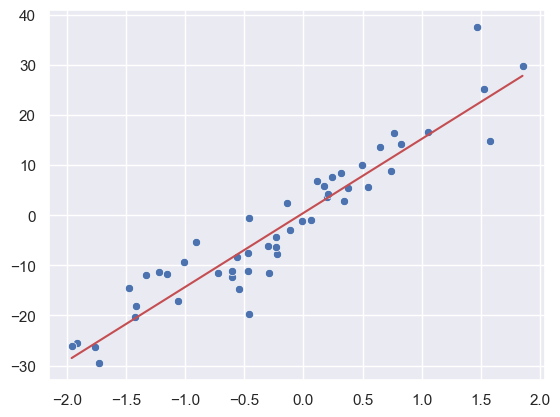

In [256]:
sns.scatterplot(x = X,y = y)
sns.lineplot(x = X,y = preds, c = 'r')

In [257]:
print(current_rmse)

4.849075194167902


Compare with Sklearn LR

4.8345004457016465


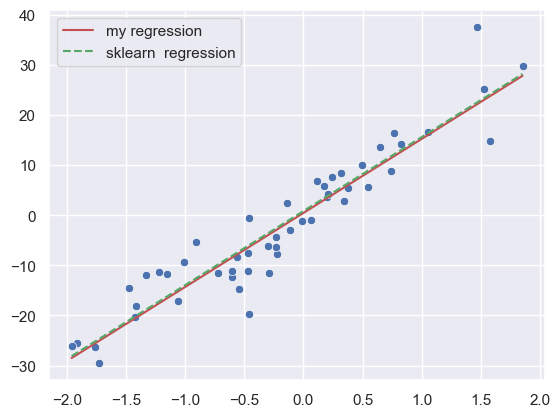

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression().fit(X.reshape(-1,1), y)
sk_preds = LR.predict(X.reshape(-1,1))

sns.scatterplot(x = X,y = y)
sns.lineplot(x = X,y = preds, c = 'r', label = 'my regression')
sns.lineplot(x = X,y = sk_preds, c = 'g',ls = 'dashed', label = 'sklearn  regression')

print(mean_squared_error(y, sk_preds, squared = False))


## Multiple Features

Most problems have more than one feature. 
Let's adjust the code to work with more than oen feature. The theory here is lifted from Andrew Ng's course. 


# Theory
## Making Predictions
The new formula for multiple linear regression expands the traditional $predictions = weights\;*\;x + bias$ to incorporate more than one feature:

$$predictions = w_0 + w_1x_1 + w_2x_2 + \ldots w_nx_n$$


This can be more succintly written in matrix form, where our weights are a vector of length(num_features) and each of our examples have a corresponding x vector also of length(num_features). 
This can be written as: 

$$ 
predictions = 

\begin{bmatrix}
x_0\\
x_1\\
\vdots\\
x_n
\end{bmatrix}

\begin{bmatrix}
w_0 & w_1 & \ldots & w_n
\end{bmatrix}

= X \cdot w^T

$$



Calculation of the predictions can be represented in python with `np.dot(X,w.T)`. 

## Gradient Descent 

The gradient descent algorithm can is defined as:

$$w_n = w_n - Learning\;Rate\;\frac{1}{n}\; \sum_{i=1}^{m}(predictions - y) \cdot X $$

In [259]:
X, y = make_regression(n_samples=50, n_features=2, noise=5, random_state=42)
print(X.shape, y.shape)

(50, 2) (50,)


50 examples with 2 features each 

In [260]:
def rmse(X, y, preds):
    n = X.shape[0]
    return np.sqrt((np.sum((preds - y)**2)) / n)

In [261]:
# Initial random weights - weights are now a matrix of length(num_features)
w = np.random.randn(X.shape[1])
# Gradient Descent
epochs = 1000
n = X.shape[0]
LR = 0.1
for _ in range(epochs):
    preds = np.dot(X,w.T) 
    # assert preds.shape[0] == X.shape[0] # 1 predicted value for each value of X
    w = w - LR * (1/n) * np.dot(preds-y, X)
current_rmse = rmse(X,y,preds)


In [262]:
current_rmse

4.714946481621791

Lets compare to sklearn

In [263]:
LR = LinearRegression().fit(X, y)
sk_preds = LR.predict(X)

print(mean_squared_error(y, sk_preds, squared = False))

4.713865235652879


Pretty close!